In [44]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.io import loadmat
from numpy import linalg as la

In [45]:
#load the dataset
data = loadmat(r"./PCA_data.mat")

#convert the data to numpy array
X = np.array(data['X'])

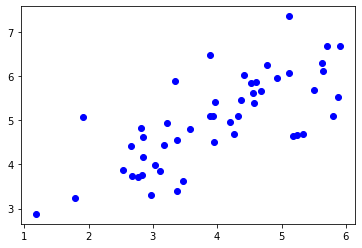

In [46]:
#plot the 2D data
plt.scatter(X[:,0],X[:,1],color="blue",marker="o")
plt.show()

### Feature Normalization

In [47]:
#Normalize the data. After normalization each features will have zero mean and all the features will be in the similar range
def Normalize(datamatrix):
    mu = np.mean(datamatrix,axis=0)
    sig = np.std(datamatrix,axis=0)
    X_norm = (datamatrix - mu)/sig
    
    return X_norm,mu,sig

In [48]:
X_norm,mu,sig = Normalize(X)

### Variance

In [49]:
print("The variance of X:",np.var(X_norm[:,0]))
print("The variance of y:",np.var(X_norm[:,1]))

The variance of X: 1.0000000000000002
The variance of y: 0.9999999999999996


### Covariance

Since on changing X, the value of y also varies. So, x and y are covariant

In [50]:
def Covariance(x1,x2):
    N = len(x1)
    mu_x1 = np.mean(x1)
    mu_x2 = np.mean(x2)
    covariance = (1/(N-1))* np.sum((x1 - mu_x1)*(x2 - mu_x2))
    
    return covariance

In [51]:
X,y = X_norm[:,0],X_norm[:,1]
print("Covariance of x & y =",Covariance(X,y))
print("Covariance of y & x =",Covariance(X,y))
print("Covariance of x with itself =",Covariance(X,X),", variance of x =",np.var(X))
print("Covariance of y with itself =",Covariance(y,y),", variance of x =",np.var(y))

Covariance of x & y = 0.7505412003462545
Covariance of y & x = 0.7505412003462545
Covariance of x with itself = 1.0204081632653061 , variance of x = 1.0000000000000002
Covariance of y with itself = 1.0204081632653057 , variance of x = 0.9999999999999996


### Covariance Matrix

In [52]:
covariance_matrix = np.cov(X_norm.T)

In [53]:
print("The covariance matrix:\n",covariance_matrix)

The covariance matrix:
 [[1.02040816 0.7505412 ]
 [0.7505412  1.02040816]]


In [54]:
#The eigen vectors for the above is given by:
lambdas,vectors = la.eig(covariance_matrix)

print("The eigen values are:\n",lambdas)
print("The normalized eigen vectors are:\n",vectors)

The eigen values are:
 [1.77094936 0.26986696]
The normalized eigen vectors are:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [55]:
#sort the eigen values in descending order of the eigen values
def sort_eigen_values(covariance_matrix):
    lambdas,vectors = la.eig(covariance_matrix)
    lambdas,vecs = zip(*sorted(zip(list(lambdas),list(vectors.T)),key=lambda x:x[0],reverse=True))
    return lambdas,np.array(vecs).T

lambdas,vecs = sort_eigen_values(covariance_matrix)
print("The sorted eigen values are:\n",lambdas)

The sorted eigen values are:
 (1.7709493636115607, 0.269866962919051)


Combining the above 3 methods constitutes a PCA

In [56]:
def PCA(X):
    covariance_matrix = np.cov(X.T)
    lambdas,vectors = la.eig(covariance_matrix)
    lambdas,vecs = sort_eigen_values(covariance_matrix)
    return lambdas,vecs

lambdas,vecs = PCA(X_norm)

In [57]:
data = data['X']

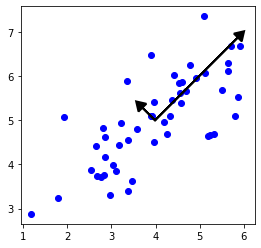

In [58]:
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], 'bo')

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * lambdas[i]*vecs[0][i], 1.5 * lambdas[i]*vecs[1][i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.set_aspect('equal')
ax.grid(False)

The above plot shows the eigen vectors plotted(after scaling) with mean being the centre.

In [87]:
#Now project the data 

def Project_data(eig_vec,k,X):
    reduced_vec = eig_vec[:,:k]

    projected_data = X.dot(reduced_vec)
    
    return projected_data.reshape(projected_data.shape[0],k)

In [60]:
k = 1
projected_data = Project_data(vecs,k,data)

In [96]:
#Recover the data from Projected data
def Recover_data(eig_vec,k,projected_data):
    reduced_vec = eig_vec[:,:k].reshape(eig_vec.shape[0],k)
    Xapprox = projected_data.dot(reduced_vec.T)
    
    return Xapprox

In [62]:
Xapprox = Recover_data(vecs,k,projected_data)

In [63]:
#check the percentage of variance retained

def Perc_Variance_retained(data,Xapprox):
    numerator = np.sum(np.square(np.abs(data - Xapprox)),axis=0)
    deno = np.sum(np.square(data),axis=0)
    
    result = np.sum(numerator/deno)
    
    return (100 - (result/len(data)))

In [64]:
variance = Perc_Variance_retained(data,Xapprox)

print("The percentage of variance retained:",variance)

The percentage of variance retained: 99.95908638597824


So, when we project this data, there is not much loss in the information of the data

## Face Image Dataset

In [88]:
facesdata = loadmat(r"./faces_data.mat")

facesdata = facesdata['X']

In [89]:
#Lets visualize some 5 faces
def Visualize(facesdata):
    for i in range(5):
        plt.imshow(facesdata[i].reshape(32, 32, order='F'), cmap='gray')
        plt.show()

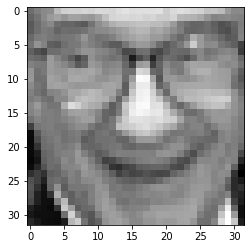

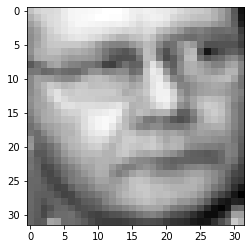

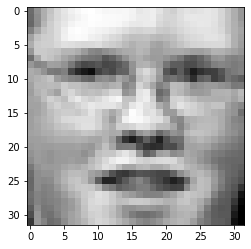

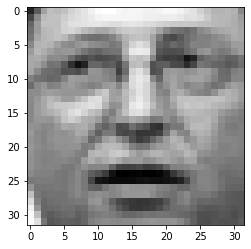

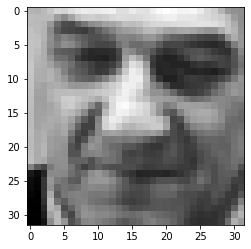

In [90]:
Visualize(facesdata)

Apply PCA

In [91]:
#Normalize the features
norm_facesdata,mean,sigma = Normalize(facesdata)

In [92]:
#Apply te PCA
eig_value,eig_vecs = PCA(norm_facesdata)

In [93]:
k = 100
projected_data = Project_data(eig_vecs,k,facesdata)

In [97]:
facesdataapprox = Recover_data(eig_vecs,k,projected_data)

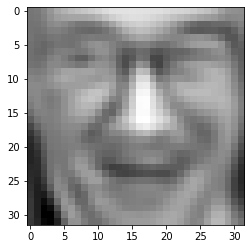

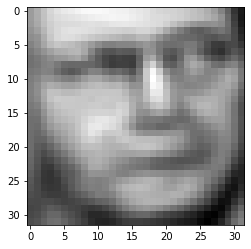

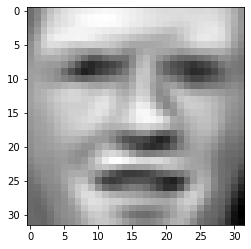

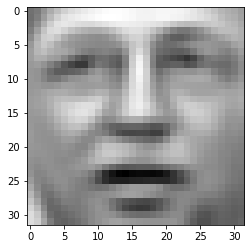

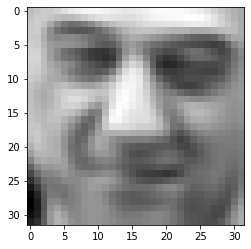

In [100]:
Visualize(facesdataapprox)

In [98]:
variance = Perc_Variance_retained(facesdata,facesdataapprox)

print("The percentage of variance retained:",variance)

The percentage of variance retained: 99.98773657720402
